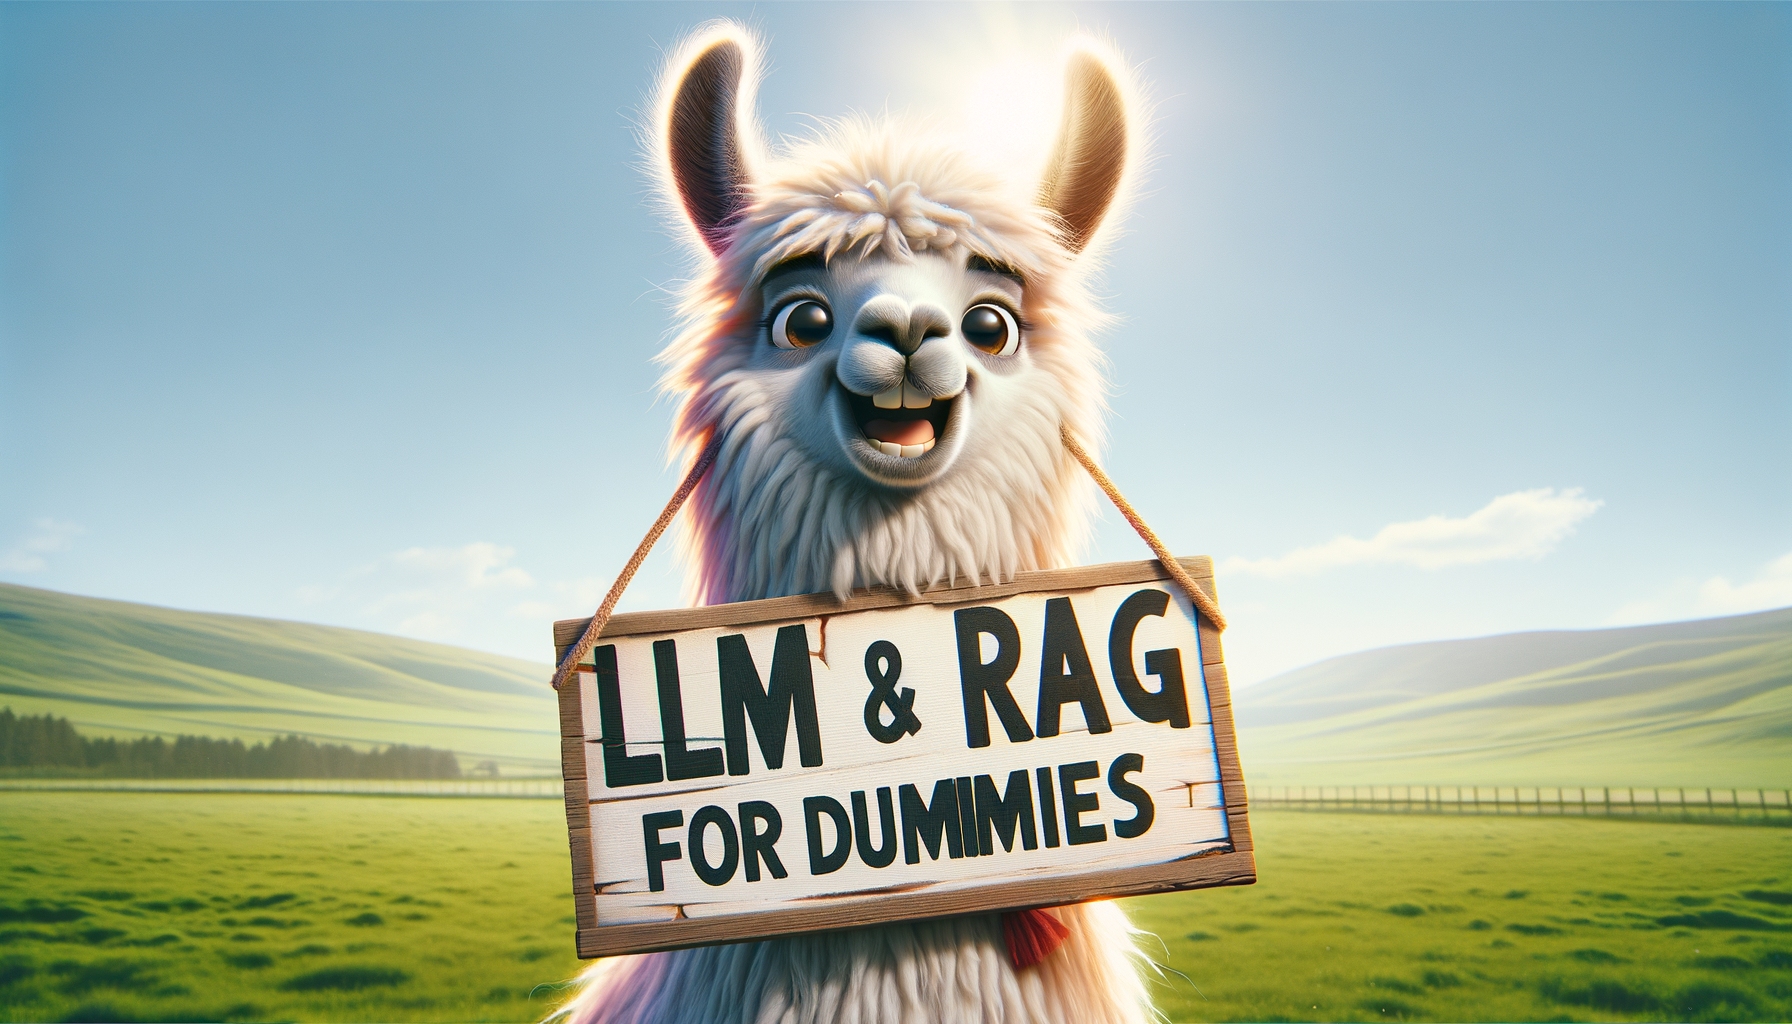

# Step-by-Step Implementation of LLM-RAG Architecture

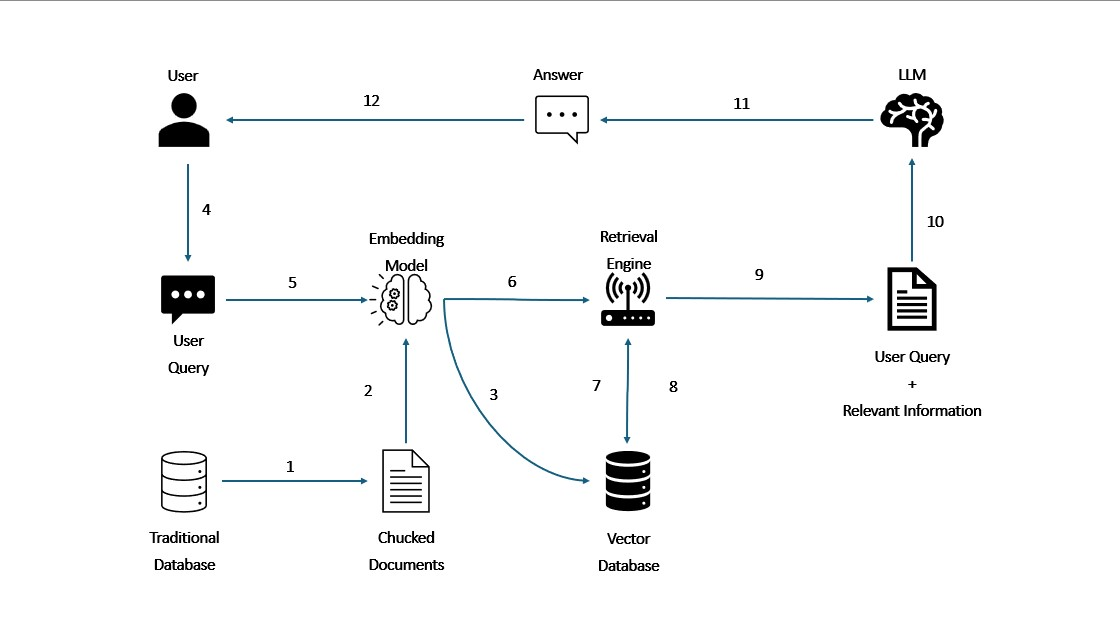

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
from wikipediaapi import Wikipedia
import textwrap
from sentence_transformers import SentenceTransformer
import ollama
import numpy as np

### Function to call Llama3

In [2]:
def llama(query):
    response = ollama.chat(model='llama3',messages=[
    {
        'role':'user',
        'content':query,
        },
    ])
    return response['message']['content']

### Asking questions to Llama3 about MotoGP Legend - 'Valentino Rossi'

#### Question 1 -

In [3]:
print(llama("Who is Valentino Rossi?"))

A legendary figure in the world of motor sports!

Valentino Rossi, also known as "The Doctor," is a Italian former professional motorcycle road racer. He is widely regarded as one of the greatest motorcycle racers of all time.

Rossi was born on February 16, 1979, in Urbino, Italy. He began his career in the sport at a young age and made his Grand Prix debut in 1996. Over the course of his illustrious career, he won an unprecedented seven World Motorcycle Championships (2001-2005, 2007, and 2008) in the MotoGP class.

Rossi's achievements are nothing short of impressive:

* 115 Grand Prix wins (a record)
* 185 podiums
* 25 pole positions

He rode for several teams throughout his career, including Honda, Yamaha, and Ducati. His most successful period was with Yamaha from 2004 to 2013, during which he won five consecutive championships.

Rossi is known for his exceptional skills on the bike, his ability to adapt to different conditions, and his intense competitive drive. He has earned nu

#### - Correct Answer

#### Question 2 -

In [4]:
print(llama("When did Valentino Rossi broke his right leg?"))

Valentino Rossi has never broken his right leg. Throughout his professional motorcycle racing career, Rossi has had several injuries and crashes, but none of them involved a broken right leg.

It's possible that you may be thinking of another rider or athlete who suffered an injury to their leg. If you could provide more information or clarify what you're referring to, I'd be happy to try and help you further!


#### - Wrong Answer

#### Question 3 -

In [5]:
print(llama("When did Valentino Rossi wore a Diego Maradona football shirt?"))

I think there may be some confusion here!

Valentino Rossi is a professional motorcycle road racer, and Diego Maradona is a former professional soccer player. I'm not aware of any instance where Valentino Rossi has worn a Diego Maradona football shirt.

It's possible that you're thinking of a photo shoot or a promotional event where Rossi wore a shirt with Maradona's image or a nod to the Argentine soccer legend, but I couldn't find any evidence of this. If you have more information or context about this, I'd be happy to help clarify!


#### - Wrong Answer

### Fetching Valentino Rossi's Wikipedia Article's Text for RAG

In [6]:
wiki = Wikipedia('RAGBot/0.0','en')
doc = wiki.page('Valentino_Rossi').text
print(doc)

Valentino Rossi (; Italian: [valenˈtiːno ˈrossi]; born 16 February 1979) is an Italian racing driver, former professional motorcycle road racer and nine-time Grand Prix motorcycle racing World Champion. Nicknamed The Doctor, he is widely considered as the greatest-ever motorcycle racer. Of Rossi's nine Grand Prix World Championships, seven were in the premier 500cc/MotoGP class. He holds the record for most premier class victories and podiums, with 89 victories and 199 podiums to his name. He won premier class World Championships with both Honda and Yamaha. He is also the only road racer to have competed in 400 or more Grands Prix. He rode with the number 46 for his entire career.
After graduating to the premier class in 2000, Rossi won the final 500cc World Championship (becoming the last satellite rider to win the top-class title to date) and the 8 Hours of Suzuka with Honda in 2001. He also won MotoGP World Championships with the factory Repsol Honda team in 2002 and 2003 and contin

### Chuncking Wikipedia's article into paragraphs

In [7]:
paragraphs = doc.split('\n\n')
for i, p in enumerate(paragraphs):
    wrapped_text = textwrap.fill(p, width=100)
    print('-'*100)
    print(wrapped_text)
    print('-'*100)
    

----------------------------------------------------------------------------------------------------
Valentino Rossi (; Italian: [valenˈtiːno ˈrossi]; born 16 February 1979) is an Italian racing
driver, former professional motorcycle road racer and nine-time Grand Prix motorcycle racing World
Champion. Nicknamed The Doctor, he is widely considered as the greatest-ever motorcycle racer. Of
Rossi's nine Grand Prix World Championships, seven were in the premier 500cc/MotoGP class. He holds
the record for most premier class victories and podiums, with 89 victories and 199 podiums to his
name. He won premier class World Championships with both Honda and Yamaha. He is also the only road
racer to have competed in 400 or more Grands Prix. He rode with the number 46 for his entire career.
After graduating to the premier class in 2000, Rossi won the final 500cc World Championship
(becoming the last satellite rider to win the top-class title to date) and the 8 Hours of Suzuka
with Honda in 2001. 

### Loading SentenceTransformer model for embeddings

In [8]:
model = SentenceTransformer('Alibaba-NLP/gte-base-en-v1.5', trust_remote_code=True)

### Creating embeddings of chunked paragraphs

In [9]:
embeddings = model.encode(paragraphs, normalize_embeddings=True)
embeddings.shape

(76, 768)

In [10]:
embeddings[0]

array([-2.19282950e-03,  1.20630302e-02, -3.64738554e-02,  3.56596485e-02,
        1.75075382e-02, -5.02214069e-03,  4.86698449e-02, -1.09525574e-02,
        2.79971622e-02,  4.04234938e-02, -9.64048225e-03, -1.68067794e-02,
       -1.54400887e-02, -3.14555056e-02, -4.82328944e-02, -3.53571177e-02,
        3.25348526e-02,  6.32601418e-03, -1.95430182e-02, -1.13153527e-03,
       -1.51352538e-03, -1.62727218e-02, -1.40309241e-02,  4.25551906e-02,
       -8.11374839e-03,  9.90381371e-03,  1.22799696e-02,  3.72930616e-02,
        2.78468449e-02, -1.19546959e-02,  7.53675681e-03, -6.82091480e-03,
       -3.46359089e-02,  1.24970414e-02, -1.55763756e-02, -6.95716124e-03,
        3.23082581e-02,  3.67451203e-03,  3.99184562e-02,  4.76031192e-02,
       -4.34906706e-02,  1.54542960e-02, -7.75154820e-03, -3.38821262e-02,
       -7.65714794e-02, -1.36343390e-02, -3.38670537e-02, -6.41323477e-02,
       -1.44561229e-03,  4.32799496e-02, -3.95526141e-02,  5.04159741e-02,
        1.54464254e-02, -

### Crearting embedding of User's Query

In [11]:
query = "When was Valentino Rossi's number 46 retired in MotoGP?"
embedded_query = model.encode(query, normalize_embeddings=True)

In [12]:
embedded_query.shape

(768,)

### Calculating similarities between embedded User query and chunked paragraphs

In [13]:
similarities = np.dot(embeddings,embedded_query.T)
similarities.shape

(76,)

In [14]:
similarities

array([0.77403283, 0.539759  , 0.49676418, 0.51596487, 0.61380726,
       0.49369943, 0.44644397, 0.6253682 , 0.5410419 , 0.55198884,
       0.54029167, 0.52432466, 0.5409658 , 0.5613445 , 0.5350473 ,
       0.61913943, 0.5146776 , 0.5401828 , 0.46681976, 0.58480465,
       0.5502601 , 0.60033053, 0.60094213, 0.58092374, 0.62844455,
       0.6334033 , 0.6325021 , 0.53233063, 0.78557414, 0.5652189 ,
       0.497751  , 0.5076583 , 0.4703436 , 0.48236454, 0.49125692,
       0.56097335, 0.52310884, 0.4956087 , 0.4350002 , 0.49269006,
       0.44992015, 0.50061804, 0.5120076 , 0.6388589 , 0.55673784,
       0.5661789 , 0.6378664 , 0.5744947 , 0.5468974 , 0.4485721 ,
       0.5286744 , 0.5248741 , 0.6054874 , 0.47061223, 0.6158744 ,
       0.5598861 , 0.56518394, 0.5994051 , 0.6283483 , 0.6075286 ,
       0.41038987, 0.49414647, 0.46238753, 0.5512481 , 0.44332725,
       0.51623935, 0.5389929 , 0.50955725, 0.4946922 , 0.48057598,
       0.4441113 , 0.56256074, 0.4922153 , 0.46525183, 0.19407

### Fetching indices of top 3 embeddings similar to user's query

In [15]:
top_3_indexes = np.argsort(similarities, axis=0)[-3:][::-1].tolist()
top_3_indexes

[28, 0, 43]

### Using indices of top 3 embeddings to retrieve their corresponding text paragraphs

In [16]:
similar_docs = [paragraphs[i] for i in top_3_indexes]
DOCUMENT = ""
for i, p in enumerate(similar_docs):
    wrapped_text = textwrap.fill(p, width=100)
    print('_'*100)
    print(wrapped_text)
    print('_'*100)
    DOCUMENT += wrapped_text+'\n\n'

____________________________________________________________________________________________________
Retirement from motorcycle racing On 5 August 2021, during the pre-event press conference of the
2021 Styrian motorcycle Grand Prix weekend, Rossi announced that he would retire from MotoGP after
the 2021 season. His last race was the 2021 Valencian Community motorcycle Grand Prix, and he was
congratulated for a successful career by various celebrities and prominent racing figures such as
Lewis Hamilton and Max Verstappen, as well as former rival Casey Stoner. Rossi's number 46 was
retired with a ceremony in the 2022 Italian motorcycle Grand Prix.
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Valentino Rossi (; Italian: [valenˈtiːno ˈrossi]; born 16 February 1979) is an Italian racing
driver, former professional motorcycle road racer

### Prompt Engineering by Integrating User's query and retrieved paragraphs

In [17]:
prompt = f"""
use the following DOCUMENT to answer the QUESTION.
If you don't know the answer, just say you don't know, don't try to make up an answer.

DOCUMENT: {DOCUMENT}
QUESTION: {query}
"""

### Asking Llama+RAG's for an Answer:

In [18]:
response = ollama.chat(model='llama3',messages=[
        {
            'role':'user',
            'content':prompt,
            },
    ])
Llama_RAG_answer = response['message']['content']

### Llama+RAG's Answer:

In [19]:
print(Llama_RAG_answer)

According to the DOCUMENT, Valentino Rossi's number 46 was retired with a ceremony in the 2022 Italian motorcycle Grand Prix.


### Llama's Answer:

In [20]:
print(llama("When was Valentino Rossi's number 46 retired in MotoGP?"))

Valentino Rossi's number 46 has not been retired in MotoGP. In fact, Rossi is still an active rider in the World Superbike Championship and has not officially retired from professional motorcycle racing.

Rossi won his first MotoGP world championship in 2001 and then went on to win six more titles (in 2002, 2003, 2004, 2005, 2008, and 2009) before moving to the World Superbike Championship in 2020.


## Comparing Answers of Llama vs Llama+RAG:
* The question was "When was Valentino Rossi's number 46 retired in MotoGP?"
  
* The same question was asked to both Llama & Llama+RAG
  
* While Llama answered that : "Valentino Rossi's number 46 has not been retired in MotoGP. In fact, Rossi is still an active rider in the World Superbike Championship and has not officially retired from professional motorcycle racing. Rossi won his first MotoGP world championship in 2001 and then went on to win six more titles (in 2002, 2003, 2004, 2005, 2008, and 2009) before moving to the World Superbike Championship in 2020."
  
* Llama+RAG answered that "Valentino Rossi's number 46 was retired with a ceremony in the 2022 Italian motorcycle Grand Prix"
  
* Comparing the 2 answers we can confidently conclude that the answer provided by Llama alone is totally incorrect and Hallucinated

* Llama+RAG used the additional information of Valentino Rossi's Wikipedia page and answered the question correctly

  

## Conclusion:
* Llama+RAG's enhances the performance of LLMs and help it overcome "Hallucinations".
